# Wine - By the Numbers - Price_Point

#### Note
* Use scipy to compare the quality points given by wine testers to the price of the bottle of wine.

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [111]:
#Import the raw data file downloaded from https://www.kaggle.com/zynicide/wine-reviews
clean_wine_file = "Output/wine_cleaned.csv"
clean_wine_df = pd.read_csv(clean_wine_file)

#Print the header from the dataset
clean_wine_df.head()

,country,description,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,Wine_Year
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [112]:
#Remove data when the price or point values in the data is blank, as both values are needed for validate comparison
wine_drop_price = clean_wine_df.dropna(subset=['points', 'price'])

In [113]:
#Create datafram containing the points and price of each row to compare
points_wine = wine_drop_price['points']
price_wine = wine_drop_price['price']

In [114]:
# Calculate the quartiles and irq of the points given by testers. 
#This enables quantitatively analysis to determine any potential outliers in the data. 
quartiles_points = points_wine.quantile([.25,.5,.75])
lowerq_points = quartiles_points[0.25]
upperq_points = quartiles_points[0.75]
iqr_points = upperq_points-lowerq_points

print(f"The lower quartile of the points is: {lowerq_points}")
print(f"The upper quartile of the points is: {upperq_points}")
print(f"The interquartile range of the points are: {iqr_points}")

lower_bound_points = lowerq_points - (1.5*iqr_points)
upper_bound_points = upperq_points + (1.5*iqr_points)

lower_outliers_points = points_wine[points_wine < lower_bound_points].count()
upper_outliers_points = points_wine[points_wine > upper_bound_points].count()
total_outliers_points = lower_outliers_points + upper_outliers_points

print(f"Lower Outliers {lower_outliers_points}")
print(f"Upper Outliers {upper_outliers_points}")
print(f"There are {total_outliers_points} outliers in the points data.")

The lower quartile of the points is: 86.0
The upper quartile of the points is: 91.0
The interquartile range of the points are: 5.0
Lower Outliers 0
Upper Outliers 47
There are 47 outliers in the points data.


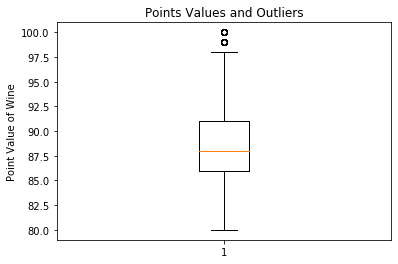

In [115]:
# Generate a box plot of the point value of the wine
fig1, ax1 = plt.subplots()
ax1.set_title('Points Values and Outliers')
ax1.set_ylabel('Point Value of Wine')
plt.boxplot([points_wine])
chart_output = "Output/Wine_Points_Box.png"
plt.savefig(chart_output)
plt.show() 

In [116]:
# Calculate the quartiles and irq of the price of the wine. 
#This enables quantitatively analysis to determine any potential outliers in the data. 
quartiles_price = price_wine.quantile([.25,.5,.75])
lowerq_price = quartiles_price[0.25]
upperq_price = quartiles_price[0.75]
iqr_price = upperq_price-lowerq_price

print(f"The lower quartile of the wine prices is: {lowerq_price}")
print(f"The upper quartile of the wine prices is: {upperq_price}")
print(f"The interquartile range of the wine prices is: {iqr_price}")

lower_bound_price = lowerq_price - (1.5*iqr_price)
upper_bound_price = upperq_price + (1.5*iqr_price)

lower_outliers_price = price_wine[price_wine < lower_bound_price].count()
upper_outliers_price = price_wine[price_wine > upper_bound_price].count()
total_outliers_price = lower_outliers_price + upper_outliers_price

print(f"Lower Outliers {lower_outliers_price}")
print(f"Upper Outliers {upper_outliers_price}")
print(f"There are {total_outliers_price} outliers in the price data.")

The lower quartile of the wine prices is: 17.0
The upper quartile of the wine prices is: 42.0
The interquartile range of the wine prices is: 25.0
Lower Outliers 0
Upper Outliers 7241
There are 7241 outliers in the price data.


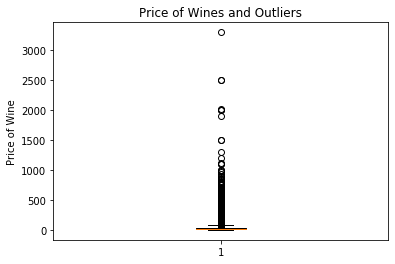

In [117]:
# Generate a box plot of the point value of the wine
fig1, ax1 = plt.subplots()
ax1.set_title('Price of Wines and Outliers')
ax1.set_ylabel('Price of Wine')
plt.boxplot([price_wine])
chart_output = "Output/Wine_Price_Box.png"
plt.savefig(chart_output)
plt.show() 

The correlation between points and price is 0.42


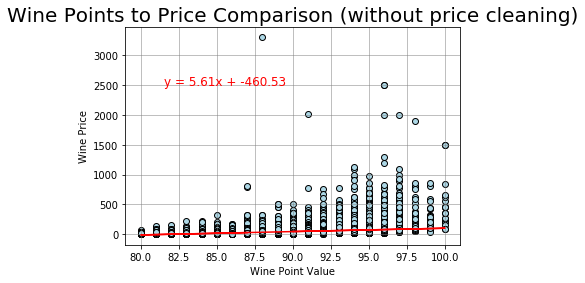

In [118]:
plt.title("Wine Points to Price Comparison (without price cleaning)", fontsize=20)
plt.xlabel("Wine Point Value", fontsize=10)
plt.ylabel("Wine Price", fontsize=10)
points_wine = wine_drop_price['points']
price_wine = wine_drop_price['price']

correlation = st.pearsonr(points_wine,price_wine)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(points_wine.astype(float), price_wine.astype(float))
regress_values = points_wine * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.scatter(points_wine,price_wine, color='lightblue',edgecolor='black')
plt.plot(points_wine,regress_values,"r-")
plt.annotate(line_eq,(81.5,2500),fontsize=12,color="red")

print(f"The correlation between points and price is {round(correlation[0],2)}")
chart_output = "Output/Wine_without_price.png"
plt.savefig(chart_output)
plt.show()

In [119]:
# OPTIONAL: Create a function to calculate and plot Linear Regression for anlysis
def liner_reg_plot(x, y, title):
    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.astype(float), y.astype(float))
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The correlation between points and price for wines {title} is {round(correlation[0],2)}")
    plt.title(f"Wine Points/Price for wines {title}", fontsize=12, wrap=True)
    plt.xlabel("Wine Point Value", fontsize=10)
    plt.ylabel("Wine Price", fontsize=10)
    plt.plot(x,regress_values,"r-")
    y_plot = (max(y)-min(y))*.75
    plt.annotate(line_eq,(min(x)+1.5,y_plot),fontsize=12,color="red")
    plt.grid(color='gray', linestyle='-', linewidth=.5)
    plt.scatter(x,y, color='lightblue',edgecolor='black')
    chart_output = "Output/Wine_" + title + ".png"
    plt.savefig(chart_output)
    plt.show()
    
    #return (line_eq, regress_values)

There are 120825 wines $500 or less
The correlation between points and price for wines $500 or less is 0.5


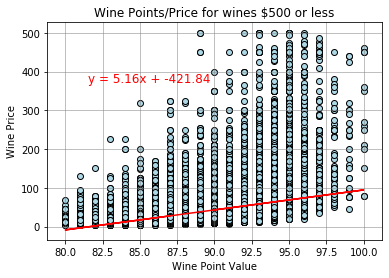

In [120]:
#Compare prices that are $500 a bottle or less
#Reset point and price values for analysis
total_wines = wine_drop_price[wine_drop_price['price'] <= 500]
x = total_wines['points']
y = total_wines['price']
title = "$500 or less"

print(f"There are {len(total_wines)} wines {title}")
liner_reg_plot(x,y,title)

There are 91 wines more than $500
The correlation between points and price for wines more than $500 is -0.14


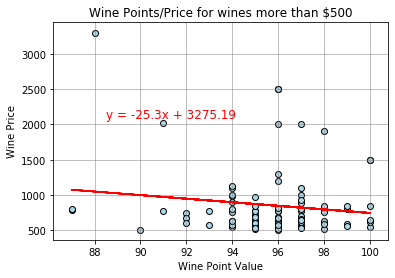

In [121]:
#Compare prices that are $500 a bottle or less
#Reset point and price values for analysis
total_wines = wine_drop_price[wine_drop_price['price'] > 500]
x = total_wines['points']
y = total_wines['price']
title = "more than $500"

print(f"There are {len(total_wines)} wines {title}")
liner_reg_plot(x,y,title)

There are 101142 wines $50 or less
The correlation between points and price for wines $50 or less is 0.5


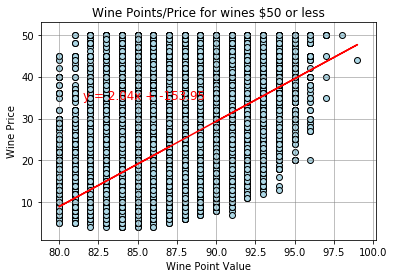

In [122]:
#Compare prices that are $500 a bottle or less
#Reset point and price values for analysis
total_wines = wine_drop_price[wine_drop_price['price'] <= 50]
x = total_wines['points']
y = total_wines['price']
title = "$50 or less"

print(f"There are {len(total_wines)} wines {title}")
liner_reg_plot(x,y,title)

In [ ]:
#